In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns

2023-04-19 00:31:19.350996: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [614]:
vueltas = pd.read_csv("../dataset_todos_pilotos/vueltas_spain_final.csv")
vueltas.drop(['Piloto'], axis = 1, inplace = True)

In [615]:
vueltas.dtypes

LapTime                float64
LapNumber              float64
TyreLife               float64
FreshTyre                int64
TrackStatus              int64
Stint                  float64
makeStop                 int64
AirTemp                float64
Rainfall                 int64
Humidity               float64
TrackTemp              float64
posicionActual         float64
tiempoPilotoDelante    float64
tiempoPilotoDetras     float64
posicionSalida         float64
anyo                     int64
nextPit                float64
compound_HARD            int64
compound_MEDIUM          int64
compound_SOFT            int64
compound_SUPERSOFT       int64
dtype: object

### Vamos a limpiarlo un poco mas...

In [616]:
vueltas = vueltas.drop(['FreshTyre', 'TrackStatus', 'makeStop','compound_MEDIUM', 'compound_SOFT', 'compound_SUPERSOFT','compound_HARD' ], axis = 1)

In [617]:
vueltas

,LapTime,LapNumber,TyreLife,Stint,AirTemp,Rainfall,Humidity,TrackTemp,posicionActual,tiempoPilotoDelante,tiempoPilotoDetras,posicionSalida,anyo,nextPit
0,132.826,3.0,4.0,1.0,16.3,1,51.0,35.6,1.0,134.646,133.906,1.0,2018,25.0
1,128.778,4.0,5.0,1.0,15.9,1,52.0,34.0,1.0,133.632,128.681,1.0,2018,25.0
2,130.044,5.0,6.0,1.0,16.1,1,52.4,36.2,1.0,127.041,129.827,1.0,2018,25.0
3,133.088,6.0,7.0,1.0,16.7,0,51.5,36.6,1.0,119.521,133.232,1.0,2018,25.0
4,82.099,7.0,8.0,1.0,16.4,0,50.3,36.7,1.0,90.479,83.604,1.0,2018,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5146,87.021,23.0,2.0,2.0,37.1,0,6.0,49.5,1.0,90.757,88.555,1.0,2022,27.0
5147,87.196,24.0,3.0,2.0,37.1,0,6.0,49.4,1.0,90.558,89.588,1.0,2022,27.0
5148,87.003,25.0,4.0,2.0,37.0,0,6.0,49.4,1.0,92.489,88.079,1.0,2022,27.0
5149,87.279,26.0,5.0,2.0,37.0,0,6.0,49.4,1.0,108.293,88.687,1.0,2022,27.0


In [618]:
vueltas_train = vueltas[vueltas['anyo'].isin([2018, 2019, 2020, 2021])]
vueltas_test = vueltas[vueltas['anyo'] == 2022]

In [619]:
vueltas_train = vueltas_train.drop(['anyo'], axis=1)
vueltas_test = vueltas_test.drop(['anyo'], axis=1)

In [620]:
vueltas_train

,LapTime,LapNumber,TyreLife,Stint,AirTemp,Rainfall,Humidity,TrackTemp,posicionActual,tiempoPilotoDelante,tiempoPilotoDetras,posicionSalida,nextPit
0,132.826,3.0,4.0,1.0,16.3,1,51.0,35.6,1.0,134.646,133.906,1.0,25.0
1,128.778,4.0,5.0,1.0,15.9,1,52.0,34.0,1.0,133.632,128.681,1.0,25.0
2,130.044,5.0,6.0,1.0,16.1,1,52.4,36.2,1.0,127.041,129.827,1.0,25.0
3,133.088,6.0,7.0,1.0,16.7,0,51.5,36.6,1.0,119.521,133.232,1.0,25.0
4,82.099,7.0,8.0,1.0,16.4,0,50.3,36.7,1.0,90.479,83.604,1.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4072,87.714,2.0,2.0,1.0,21.7,0,58.0,31.6,17.0,88.135,88.774,16.0,6.0
4073,86.076,3.0,3.0,1.0,21.7,0,57.9,31.8,17.0,86.736,87.083,16.0,6.0
4074,86.189,4.0,4.0,1.0,21.8,0,58.5,31.6,17.0,86.209,86.223,16.0,6.0
4075,84.825,5.0,5.0,1.0,21.8,0,57.9,31.6,16.0,85.571,87.216,16.0,6.0


In [621]:
vueltas_train = vueltas_train.astype(float)
vueltas_test = vueltas_test.astype(float)

In [622]:
vueltas_train.dtypes

LapTime                float64
LapNumber              float64
TyreLife               float64
Stint                  float64
AirTemp                float64
Rainfall               float64
Humidity               float64
TrackTemp              float64
posicionActual         float64
tiempoPilotoDelante    float64
tiempoPilotoDetras     float64
posicionSalida         float64
nextPit                float64
dtype: object

In [623]:
vueltas_test

,LapTime,LapNumber,TyreLife,Stint,AirTemp,Rainfall,Humidity,TrackTemp,posicionActual,tiempoPilotoDelante,tiempoPilotoDetras,posicionSalida,nextPit
4077,87.509,2.0,5.0,1.0,36.7,0.0,7.0,49.4,2.0,87.627,87.831,2.0,13.0
4078,87.574,3.0,6.0,1.0,36.9,0.0,6.0,49.4,2.0,87.198,87.009,2.0,13.0
4079,87.601,4.0,7.0,1.0,37.0,0.0,6.0,49.5,2.0,87.671,88.177,2.0,13.0
4080,87.937,5.0,8.0,1.0,37.0,0.0,6.0,49.3,2.0,87.891,88.503,2.0,13.0
4081,87.761,6.0,9.0,1.0,36.9,0.0,6.0,49.5,2.0,87.427,88.655,2.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5146,87.021,23.0,2.0,2.0,37.1,0.0,6.0,49.5,1.0,90.757,88.555,1.0,27.0
5147,87.196,24.0,3.0,2.0,37.1,0.0,6.0,49.4,1.0,90.558,89.588,1.0,27.0
5148,87.003,25.0,4.0,2.0,37.0,0.0,6.0,49.4,1.0,92.489,88.079,1.0,27.0
5149,87.279,26.0,5.0,2.0,37.0,0.0,6.0,49.4,1.0,108.293,88.687,1.0,27.0


In [624]:
vueltas_test.shape

(1074, 13)

In [625]:
scaler = MinMaxScaler()
scaler.fit(vueltas_train)
vueltas_train_scaler = scaler.transform(vueltas_train)
vueltas_test_scaler = scaler.transform(vueltas_test)


In [626]:
vueltas_train_scaler

array([[0.78962162, 0.01587302, 0.06666667, ..., 0.63167894, 0.05      ,
        0.31666667],
       [0.73127207, 0.03174603, 0.08888889, ..., 0.57259332, 0.05      ,
        0.31666667],
       [0.74952072, 0.04761905, 0.11111111, ..., 0.58555258, 0.05      ,
        0.31666667],
       ...,
       [0.11737658, 0.03174603, 0.06666667, ..., 0.09246757, 0.8       ,
        0.        ],
       [0.09771532, 0.04761905, 0.08888889, ..., 0.10369667, 0.8       ,
        0.        ],
       [0.10237117, 0.06349206, 0.11111111, ..., 0.0903077 , 0.8       ,
        0.        ]])

In [627]:
vueltas_test_scaler

array([[0.1364036 , 0.        , 0.08888889, ..., 0.11065124, 0.1       ,
        0.11666667],
       [0.13734054, 0.01587302, 0.11111111, ..., 0.10135586, 0.1       ,
        0.11666667],
       [0.13772973, 0.03174603, 0.13333333, ..., 0.1145639 , 0.1       ,
        0.11666667],
       ...,
       [0.12910991, 0.36507937, 0.06666667, ..., 0.11345569, 0.05      ,
        0.35      ],
       [0.13308829, 0.38095238, 0.08888889, ..., 0.12033111, 0.05      ,
        0.35      ],
       [0.4462991 , 0.3968254 , 0.11111111, ..., 0.11830693, 0.05      ,
        0.35      ]])

In [628]:
df = pd.DataFrame(vueltas_train_scaler)

In [629]:
df[:40]

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.789622,0.015873,0.066667,0.000000,0.046358,1.0,0.251852,0.333333,0.000000,0.640047,0.631679,0.05,0.316667
1,0.731272,0.031746,0.088889,0.000000,0.019868,1.0,0.325926,0.254902,0.000000,0.628580,0.572593,0.05,0.316667
2,0.749521,0.047619,0.111111,0.000000,0.033113,1.0,0.355556,0.362745,0.000000,0.554048,0.585553,0.05,0.316667
3,0.793398,0.063492,0.133333,0.000000,0.072848,0.0,0.288889,0.382353,0.000000,0.469010,0.624057,0.05,0.316667
4,0.058422,0.079365,0.155556,0.000000,0.052980,0.0,0.200000,0.387255,0.000000,0.140595,0.062851,0.05,0.316667
5,0.051676,0.095238,0.177778,0.000000,0.046358,0.0,0.244444,0.387255,0.000000,0.096211,0.047642,0.05,0.316667
6,0.048144,0.111111,0.200000,0.000000,0.046358,1.0,0.281481,0.323529,0.000000,0.086158,0.050084,0.05,0.316667
7,0.043719,0.126984,0.222222,0.000000,0.039735,1.0,0.251852,0.308824,0.000000,0.084552,0.050774,0.05,0.316667
8,0.054227,0.142857,0.244444,0.000000,0.052980,1.0,0.355556,0.338235,0.000000,0.080345,0.044747,0.05,0.316667
9,0.043748,0.158730,0.266667,0.000000,0.066225,1.0,0.229630,0.367647,0.000000,0.078287,0.054608,0.05,0.316667


In [632]:
trainX = []
trainY = []
testX = []
testY = []
loopback = 10 # Esto es el numero de muestras que usara en el pasado 
future = 1 # Esto es el numero de hechos futuros que usará como salida a las 10 muestras del pasado

for i in range (loopback, len(vueltas_train_scaler) -future +1):
    trainX.append(vueltas_train_scaler[i-loopback:i, 0:vueltas_train.shape[1]])
    trainY.append(vueltas_train_scaler[i + future - 1:i + future, 12])
    print(vueltas_train_scaler[i + future - 1:i + future, 5])
    
for i in range (loopback, len(vueltas_test_scaler) -future +1):
    testX.append(vueltas_test_scaler[i-loopback:i, 0:vueltas_test.shape[1]])
    testY.append(vueltas_test_scaler[i + future - 1:i + future,12
                                    ])


[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[1.]
[1.]
[1.]
[0.]
[0.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[1.]
[1.]
[1.]
[0.]
[0.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[1.]
[1.]
[1.]
[0.]
[0.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[1.]


In [633]:
trainX, trainY, testX, testY = np.array(trainX), np.array(trainY), np.array(testX), np.array(testY)

In [634]:
trainX.shape

(4067, 10, 13)

In [635]:
trainY.shape

(4067, 1)

In [636]:
testX.shape

(1064, 10, 13)

In [637]:
testY.shape

(1064, 1)

In [638]:
trainX

array([[[0.78962162, 0.01587302, 0.06666667, ..., 0.63167894,
         0.05      , 0.31666667],
        [0.73127207, 0.03174603, 0.08888889, ..., 0.57259332,
         0.05      , 0.31666667],
        [0.74952072, 0.04761905, 0.11111111, ..., 0.58555258,
         0.05      , 0.31666667],
        ...,
        [0.04371892, 0.12698413, 0.22222222, ..., 0.05077405,
         0.05      , 0.31666667],
        [0.05422703, 0.14285714, 0.24444444, ..., 0.04474675,
         0.05      , 0.31666667],
        [0.04374775, 0.15873016, 0.26666667, ..., 0.05460755,
         0.05      , 0.31666667]],

       [[0.73127207, 0.03174603, 0.08888889, ..., 0.57259332,
         0.05      , 0.31666667],
        [0.74952072, 0.04761905, 0.11111111, ..., 0.58555258,
         0.05      , 0.31666667],
        [0.7933982 , 0.06349206, 0.13333333, ..., 0.62405717,
         0.05      , 0.31666667],
        ...,
        [0.05422703, 0.14285714, 0.24444444, ..., 0.04474675,
         0.05      , 0.31666667],
        [0.0

In [639]:
model = Sequential()
model.add(LSTM(256, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(128, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

In [640]:
from keras import regularizers
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True, kernel_regularizer=regularizers.l2(0.01)))
model.add(LSTM(32, activation='relu', return_sequences=False, kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.25))
model.add(Dense(trainY.shape[1]))

In [641]:
model.compile(optimizer="adam", loss= "mse")
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_53 (LSTM)              (None, 10, 64)            19968     
                                                                 
 lstm_54 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_21 (Dropout)        (None, 32)                0         
                                                                 
 dense_22 (Dense)            (None, 1)                 33        
                                                                 
Total params: 32,417
Trainable params: 32,417
Non-trainable params: 0
_________________________________________________________________


Epoch 1/12
229/229 [==============================] - 4s 9ms/step - loss: 0.3845 - val_loss: 0.0934
Epoch 2/12
229/229 [==============================] - 2s 8ms/step - loss: 0.0722 - val_loss: 0.0503
Epoch 3/12
229/229 [==============================] - 2s 8ms/step - loss: 0.0492 - val_loss: 0.0392
Epoch 4/12
229/229 [==============================] - 2s 8ms/step - loss: 0.0413 - val_loss: 0.0332
Epoch 5/12
229/229 [==============================] - 2s 8ms/step - loss: 0.0387 - val_loss: 0.0369
Epoch 6/12
229/229 [==============================] - 2s 8ms/step - loss: 0.0350 - val_loss: 0.0341
Epoch 7/12
229/229 [==============================] - 2s 8ms/step - loss: 0.0330 - val_loss: 0.0374
Epoch 8/12
229/229 [==============================] - 2s 8ms/step - loss: 0.0308 - val_loss: 0.0326
Epoch 9/12
229/229 [==============================] - 2s 8ms/step - loss: 0.0311 - val_loss: 0.0291
Epoch 10/12
229/229 [==============================] - 2s 8ms/step - loss: 0.0294 - val_loss: 0.0259

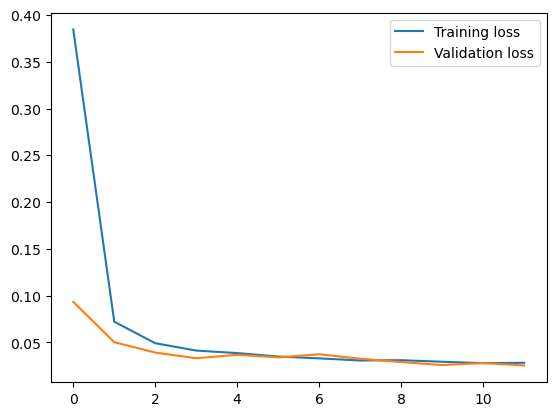

In [642]:
history = model.fit(trainX, trainY, epochs=12, batch_size=16, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [650]:
prediction = model.predict(trainX[0:1]) 

1/1 [==============================] - 0s 22ms/step


In [651]:
prediction

array([[0.32843333]], dtype=float32)

In [652]:
prediction_copies = np.repeat(prediction, testX.shape[2], axis=-1)

In [653]:
prediction_copies

array([[0.32843333, 0.32843333, 0.32843333, 0.32843333, 0.32843333,
        0.32843333, 0.32843333, 0.32843333, 0.32843333, 0.32843333,
        0.32843333, 0.32843333, 0.32843333]], dtype=float32)

In [654]:
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]


In [655]:
y_pred_future

array([100.83106], dtype=float32)

In [656]:
trainY[0]

array([0.31666667])